Saving statistics.xlsx to statistics (2).xlsx
   application_id  Interview Taken on    Status event_name  \
0          383422 2014-05-01 11:40:49     Hired       Male   
1          907518 2014-05-06 08:08:32     Hired     Female   
2          176719 2014-05-06 08:08:54  Rejected       Male   
3          429799 2014-05-02 16:28:59  Rejected     Female   
4          253651 2014-05-02 16:32:26     Hired       Male   

              Department Post Name  Offered Salary  
0     Service Department        c8         56553.0  
1     Service Department        c5         22075.0  
2     Service Department        c5         70069.0  
3  Operations Department        i4          3207.0  
4  Operations Department        i4         29668.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7168 entries, 0 to 7167
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   application_id      7168 non-null   int6

/tmp/ipython-input-27-1086756841.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['Salary Range'] = pd.cut(data_final['Offered Salary'], bins=salary_bins, labels=salary_labels, include_lowest=True)


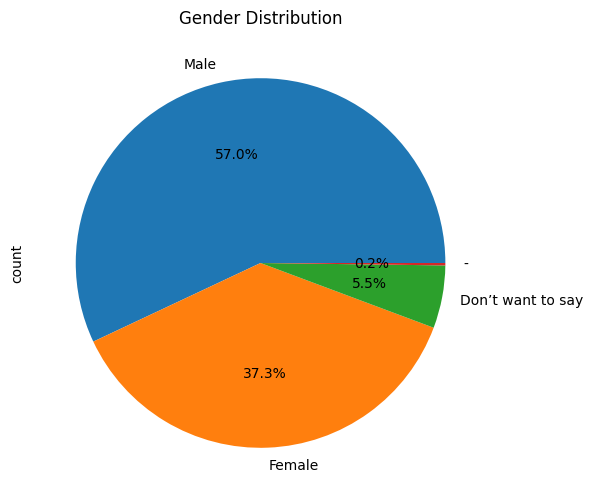

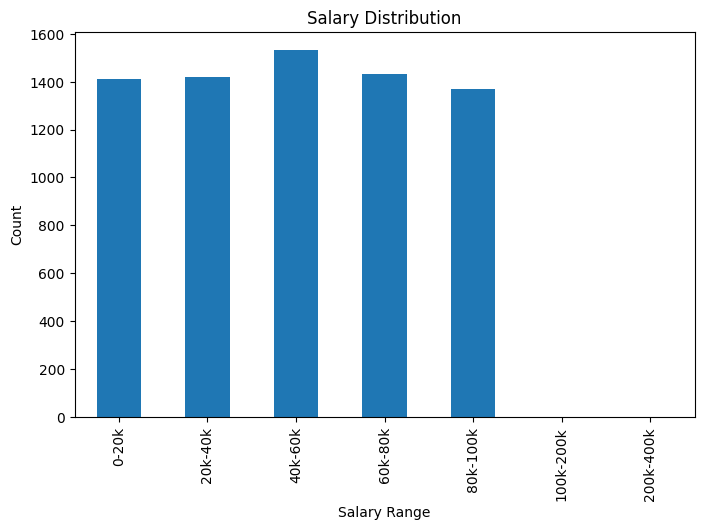

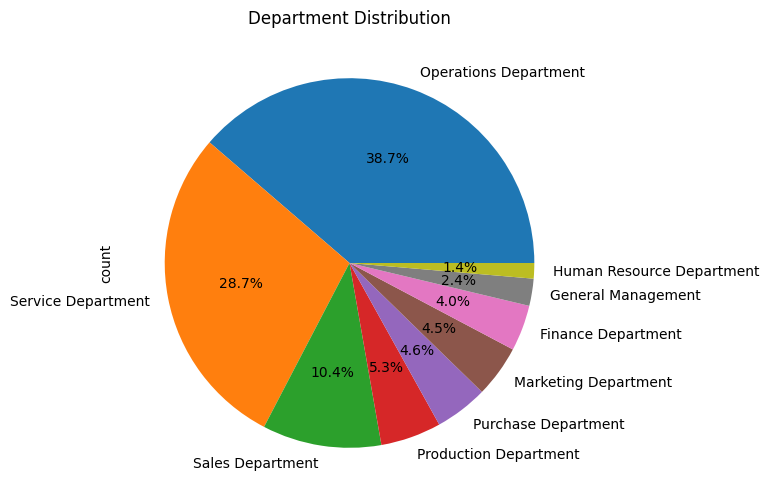

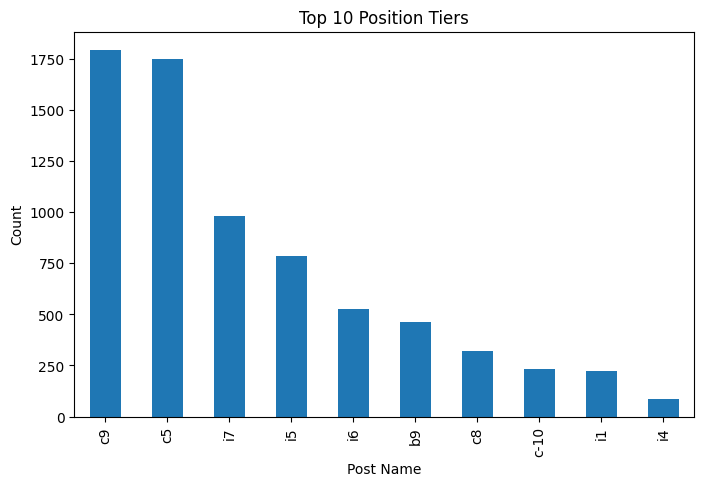

In [27]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Dataset


from google.colab import files
uploaded = files.upload()


# 2. Initial Inspection
print(data.head())
print(data.info())
print(data.describe(include='all'))

# 3. Handling Missing Data (1 missing Offered Salary)
data_clean = data.dropna(subset=['Offered Salary'])

# 4. Outlier Detection Using IQR Method
Q1 = data_clean['Offered Salary'].quantile(0.25)
Q3 = data_clean['Offered Salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove Outliers
data_final = data_clean[(data_clean['Offered Salary'] >= lower_bound) &
                        (data_clean['Offered Salary'] <= upper_bound)]

# 5. Gender Distribution
gender_counts = data_final['event_name'].value_counts()
print(gender_counts)

# 6. Average Salary Calculation
average_salary = data_final['Offered Salary'].mean()
print(f'Average Salary: ₹{average_salary:.2f}')

# 7. Salary Distribution Class Intervals
salary_bins = [0, 20000, 40000, 60000, 80000, 100000, 200000, 400000]
salary_labels = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k-200k', '200k-400k']
data_final['Salary Range'] = pd.cut(data_final['Offered Salary'], bins=salary_bins, labels=salary_labels, include_lowest=True)
print(data_final['Salary Range'].value_counts())

# 8. Departmental Analysis
department_counts = data_final['Department'].value_counts()
print(department_counts)

# 9. Position Tier Analysis
post_counts = data_final['Post Name'].value_counts()
print(post_counts.head(10))

# 10. Visualizations

# Gender Distribution Pie Chart
plt.figure(figsize=(6,6))
data_final['event_name'].value_counts().plot.pie(autopct='%1.1f%%', title='Gender Distribution')
plt.show()

# Salary Distribution Bar Chart
plt.figure(figsize=(8,5))
data_final['Salary Range'].value_counts().sort_index().plot.bar(title='Salary Distribution')
plt.ylabel('Count')
plt.show()

# Department Distribution Pie Chart
plt.figure(figsize=(8,6))
data_final['Department'].value_counts().plot.pie(autopct='%1.1f%%', title='Department Distribution')
plt.show()

# Top 10 Position Tiers Bar Chart
plt.figure(figsize=(8,5))
data_final['Post Name'].value_counts().head(10).plot.bar(title='Top 10 Position Tiers')
plt.ylabel('Count')
plt.show()